In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 13]

# The Activation layer

An activation layer is like a switch, which determines what Neuron needs to fire.

The Activation layer is what brings non-linearity in the network.
If the system was linear, there would always be a single composite transformation to represent the whole network, which defeats the purpose of deep networks.

In [4]:
img1 = plt.imread('zebra.jpg')
img2 = plt.imread('lion.jpg')
gray1 = np.mean(img1[...,:3], -1)
gray2 = np.mean(img2[...,:3], -1)

In [6]:
gray1

array([[ 0.27682587,  0.25428223,  0.26179678, ...,  0.26430163,
         0.18164164,  0.06391378],
       [ 0.30688405,  0.26179678,  0.22422406, ...,  0.16661255,
         0.19667073,  0.13905922],
       [ 0.14156407,  0.25428223,  0.30688405, ...,  0.17412709,
         0.20418527,  0.22923375],
       ...,
       [ 0.11651559,  0.22171921,  0.01882651, ..., -0.06383348,
         0.15408831, -0.02125106],
       [ 0.16160285, -0.17655165,  0.04888469, ..., -0.01373652,
         0.10649619, -0.08136742],
       [ 0.25177739,  0.1691174 ,  0.13905922, ..., -0.02125106,
         0.12903983, -0.05882378]])

## Example Activation layers:

### Step function

As simple as it gets: the step function is a binary switch. It's 0 if the input is negative, and 1 if the output is positive.

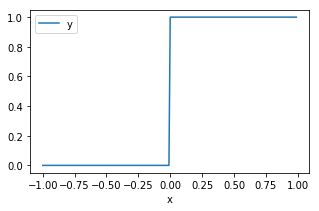

In [19]:
x = np.array(range(-100,100, 1)) / 100.0
y = np.append(np.zeros(100), np.ones(100), axis=0)
df = pd.DataFrame({'x': x, 'y': y})
df.plot(x='x', y='y', figsize=(5,3))

The issue with a step function is that the model can easily get stuck: no matter the value in negative, it will output 0, on the positive side, not matter the value it will return 1, therefore there is no possible way to 'tune' the parameters to improve the model

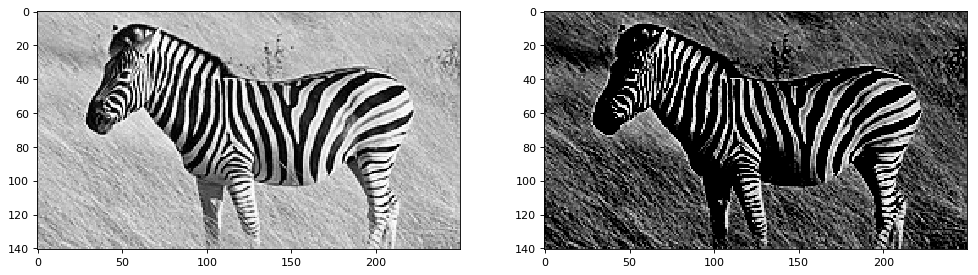

In [13]:
o = gray1.copy()
np.clip(gray1, 0.0, 1.0, out=o)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80)
ax[0].imshow(gray1, cmap='gray')
ax[1].imshow(o, cmap='gray')

### Sigmoid

The sigmoid function is very common: it provides a non-linear range that now allows the model to fit more easily

In [15]:
def sigmoid(x):
    y = 1.0 / (1.0 + np.exp(-1.0 * x))
    return y

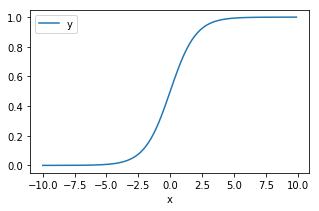

In [16]:
x = np.array(range(-100, 100, 1)) / 10.0
y = sigmoid(x)
df = pd.DataFrame({'x': x, 'y': y})
df.plot(x='x', y='y', figsize=(5,3))

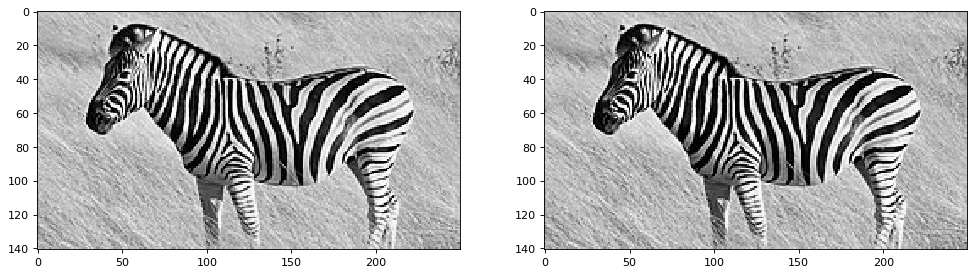

In [17]:
o = sigmoid(gray1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80)
ax[0].imshow(gray1, cmap='gray')
ax[1].imshow(o, cmap='gray')

### Arctangent

Similar to the sigmoid, but with a different slope

In [21]:
def atan(x):
    return np.arctan(x)

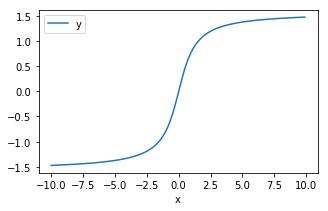

In [23]:
X = np.array(range(-100, 100, 1)) / 10.0
y = atan(X)
df = pd.DataFrame({'x': x, 'y': y})
df.plot(x='x', y='y', figsize=(5,3))

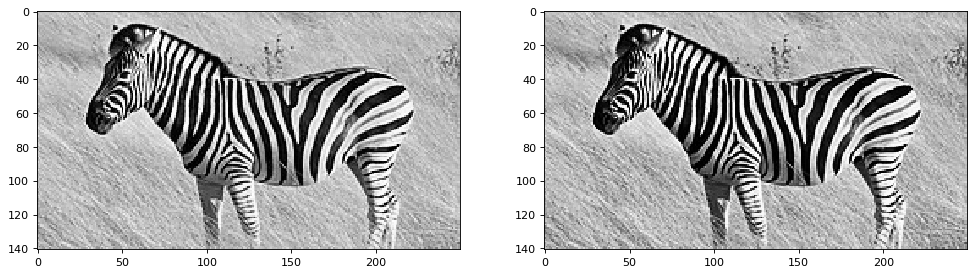

In [24]:
h, w = gray1.shape
o = atan(gray1.reshape(-1)).reshape(h, w)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80)
ax[0].imshow(gray1, cmap='gray')
ax[1].imshow(o, cmap='gray')

### ReLU: Rectifier Linear Unit

The standard ReLU is basically a function that is 0 for negative numbers, and y=x for positive numbers

In [32]:
def ReLU(x):
    if x >= 0.0:
        return x
    else:
        return 0.0

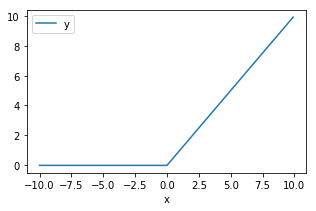

In [34]:
X = np.array(range(-100, 100, 1)) / 10.0
y = np.vectorize(ReLU)(X)
df = pd.DataFrame({'x': x, 'y': y})
df.plot(x='x', y='y', figsize=(5,3))

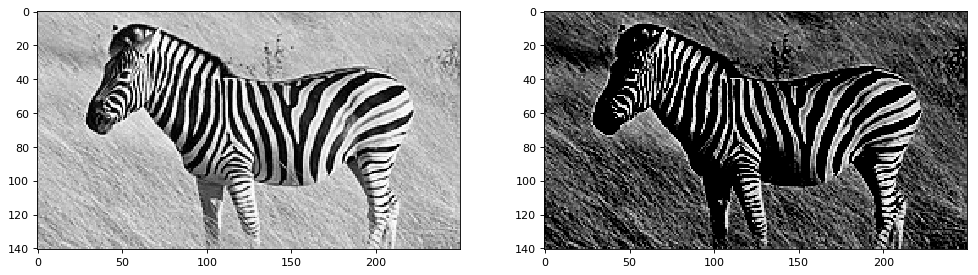

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80)
ax[0].imshow(gray1, cmap='gray')
ax[1].imshow(np.vectorize(ReLU)(gray1), cmap='gray')

The ReLU is effective, but like the step function, the optimizer may get stuck on negative numbers because the output is 0 no matter what the negative value

### Leaky ReLU

The leaky ReLU solves the problems of the ReLU by 'leaking' through on the negative side, so that there is a much lower slope to the function

In [37]:
def LeakyReLU(x, p):
    if x >=0:
        return x
    else:
        return x / p

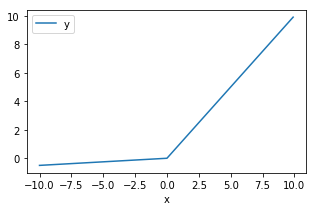

In [38]:
X = np.array(range(-100, 100, 1)) / 10.0
y = np.vectorize(LeakyReLU)(X, 20.0)
df = pd.DataFrame({'x': x, 'y': y})
df.plot(x='x', y='y', figsize=(5,3))

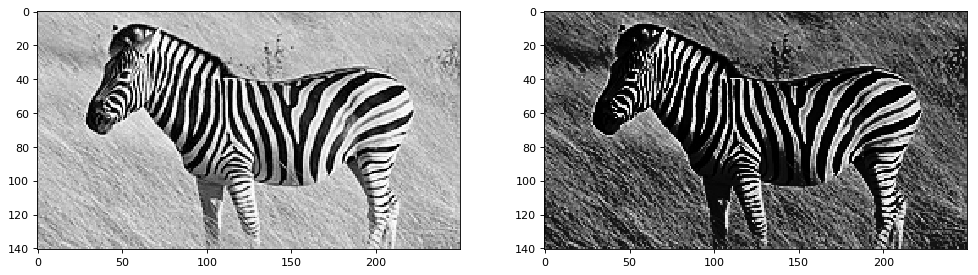

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80)
ax[0].imshow(gray1, cmap='gray')
ax[1].imshow(np.vectorize(LeakyReLU)(gray1, 20.0), cmap='gray')

### Other examples:

### Swish

Swish has become popular at some point, but many other papers report worse results.
http://aclweb.org/anthology/D18-1472

So, something to try maybe, maybe not

In [78]:
def swish(x):
    return x * sigmoid(x)

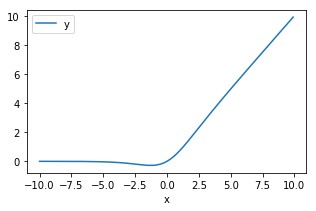

In [79]:
X = np.array(range(-100, 100, 1)) / 10.0
y = [swish(x) for x in X]
df = pd.DataFrame({'x': x, 'y': y})
df.plot(x='x', y='y', figsize=(5,3))

### ReLU6

The idea of ReLU6 is that with a ReLU, the model may end up diverging to infinity because of the y=x part of the equation.
ReLU6 limits y to 6 for x >= 6

In [80]:
def ReLU6(x):
    if x > 6:
        return 6
    if x >=0:
        return x
    else:
        return 0

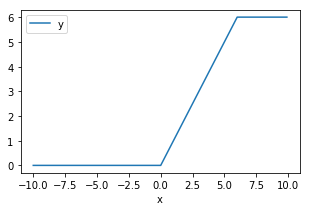

In [81]:
X = np.array(range(-100, 100, 1)) / 10.0
y = [ReLU6(x) for x in X]
df = pd.DataFrame({'x': x, 'y': y})
df.plot(x='x', y='y', figsize=(5,3))